# Predicting car Prices
### A Machine Leanring Project
---

This project goes through the machine learning workflow of predicting a car's market price based on the data set `"Automobile data set"` from [here](https://archive.ics.uci.edu/ml/datasets/automobile).

Download: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

The data set has information for each car about its technical aspects (such as the motor's displacement, the weight of the car, the miles per gallon, how fast te car accelerates, and more...)

## Exploring and Cleaning the Dataset
---

In [1]:
import pandas as pd
df = pd.read_csv('imports-85.data')

In [2]:
df[:5]

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


It seems that the column names are missing here. We'll re-read the dataset without the headers, and then grab the column names off of the documentation link provided at the beginning of this report.

Columns:

| Attribute | Attribute Range  |
| --------- | ---------------  |
| symboling | -3, -2, -1, 0, 1, 2, 3 |
| normalized-losses | continuous from 65 to 256 |
| make | alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo |
| fuel-type | diesel, gas |
| aspiration | std, turbo |
| num-of-doors | four, two |
| body-style | hardtop, wagon, sedan, hatchback, convertible |
| drive-wheels | 4wd, fwd, rwd |
| engine-location | front, rear |
| wheel-base | continuous from 86.6 120.9 |
| length | continuous from 141.1 to 208.1 |
| width | continuous from 60.3 to 72.3 |
| height | continuous from 47.8 to 59.8 |
| curb-weight | continuous from 1488 to 4066 |
| engine-type | dohc, dohcv, l, ohc, ohcf, ohcv, rotor |
| num-of-cylinders | eight, five, four, six, three, twelve, two |
| engine-size | continuous from 61 to 326 |
| fuel-system | 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi |
| bore | continuous from 2.54 to 3.94 |
| stroke | continuous from 2.07 to 4.17 |
| compression-ratio | continuous from 7 to 23 |
| horsepower | continuous from 48 to 288 |
| peak-rpm | continuous from 4150 to 6600 |
| city-mpg | continuous from 13 to 49 |
| highway-mpg | continuous from 16 to 54 |
| price | continuous from 5118 to 45400 |

In [3]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [4]:
df = pd.read_csv('imports-85.data', names=cols)

In [5]:
df[:5]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now, let's identify the numeric columns so we can use them as featres. Also, we'll identify the target columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [7]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
print('Number of Columns: ', str(len(df.describe().columns) - 1))

Number of Columns:  9


From both the results, we can identify many numeric columns, but only 10 numberic columns are coming, rest are all coming as object columns (strings).

By analysing the columns, we can conclude the following:
1. The columns on the dataset contains missing values, and are represented with the `"?"` sign. We'll need to replace these values and look for the presence of missing values in other numeric columns as well.
2. The columns `"num-of-doors"` and `"num-of-cylinders"` are representing numbers in letters (two, four, eight, etc...). However, we'll just work with continuous columns for this project.
3. We'll also rescale the values in the numeric clumns so they all range from 0 to 1.

In [9]:
# Denoting continuous columns
continuous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cdf = df[continuous_cols].copy()

# Replacing "?" with np.nan
import numpy as np
cdf.replace('?', np.nan, inplace=True)

# Making values numeric instead of strings for string columns
cdf = cdf.astype(float)

In [10]:
# Checking for missing values on "normalized-losses" column
cdf['normalized-losses'].isnull().value_counts()

False    164
True      41
Name: normalized-losses, dtype: int64

Quoting from the file `"imports-85.names"` (which can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/)):

>"...The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "symboling".  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe."

This indicates that the column in important for us, so for the missing values, we can at least fill them with the mean of the available values. For this, let's check all missing values as well, and fill them with the mean.

In [11]:
cdf.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In this case, our target column is the `"price"` column, so here, we can just drop those rows with missing values before the filling.

In [12]:
cdf.dropna(subset=['price'], inplace=True)

In [13]:
cdf.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Now, we can fill the missing values with the mean of the total values that exist for each numeric column.

In [14]:
cdf.fillna(cdf.mean(), inplace=True)

In [15]:
cdf.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [16]:
cdf.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


Now in order for us to start, we need to first normalize the numeric values to range from 0 to 1.

In [17]:
normalized_cdf = ((cdf - cdf.min()) / (cdf.max() - cdf.min()))

# Fixing the "price" column, since we don't want to apply normalization to i
normalized_cdf['price'] = cdf['price']

In [28]:
normalized_cdf.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Predictions
---
Now since we're predicting the price based on different features (columns), we'll start with some **univariate k-nearest neighbors models**. Starting with simple models before moving to more complex models helps us structure our code workflow and understand the features better.

For this, we'll create a function that takes 3 arguments, the training column's name, the target column's name, and the dataframe object that we're woking on.

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    # Shuffle rows
    np.random.seed(1)
    shuffled_indexes = np.random.permutation(df.index)
    work_df = df.reindex(shuffled_indexes)
    # Split rows
    split_number = len(work_df) // 2
    train_df = work_df.iloc[:split_number].copy()
    test_df = work_df.iloc[split_number:].copy()
    # Fit model using k nearest neighbors
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_col]], train_df[[target_col]])
    # Make predictions using model
    predictions = knn.predict(test_df[[train_col]])
    # Calculate RMSE
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse ** (1/2)
    return rmse

The above function will split the dataframe into 2 halves, one for training purpose, and the other for testing our model. Then it'll instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set. Finally, it will return the RMSE (Root Mean Squared Error) value.

>Root mean squared error is an error metric whose units are the base unit (in our case, dollars). RMSE for short, this  error metric is calculated by taking the square root of the MSE value.

So we're going to loop through the columns (except the `"price"` column ofcourse) and get their RMSE values into a separate Series.

In [20]:
rmse_values = pd.Series(index=continuous_cols[:-1])

for col in continuous_cols[:-1]:
    rmse_values[col] = knn_train_test(col, 'price', normalized_cdf)

In [21]:
rmse_values.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-ratio    6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

From the above, we notice that the `"engine-size"` preformed the best using the default `k` value. We're going to modify the function to take different k values (we'll use 1, 3, 5, 7, and 9).

In [22]:
def knn_train_test(train_col, target_col, df, k=5):
    # Shuffle rows
    np.random.seed(1)
    shuffled_indexes = np.random.permutation(df.index)
    work_df = df.reindex(shuffled_indexes)
    # Split rows
    split_number = len(work_df) // 2
    train_df = work_df.iloc[:split_number].copy()
    test_df = work_df.iloc[split_number:].copy()
    # Fit model using k nearest neighbors
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[train_col]], train_df[[target_col]])
    # Make predictions using model
    predictions = knn.predict(test_df[[train_col]])
    # Calculate RMSE
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse ** (1/2)
    return rmse

Now, for each numeric column, we're going to create, train, and test a univariate model using the k values mentione earlier.

In [46]:
rmse_values = {}
k_values = [1,3,5,7,9]

for col in continuous_cols[:-1]:
    temp = {}
    for k in k_values:
        temp[k] = knn_train_test(col, 'price', normalized_cdf, k)
    rmse_values[col] = temp

rmse_df = pd.DataFrame(rmse_values)
rmse_df

,bore,city-mpg,compression-ratio,curb-weight,engine-size,height,highway-mpg,horsepower,length,normalized-losses,peak-rpm,stroke,wheel-base,width
1,8602.588485,5901.143574,8087.205347,5264.290231,3258.486106,8904.046456,6025.594967,4170.054848,4628.455501,7846.750605,9511.480068,9116.495955,4493.734069,4559.257298
3,6984.239489,4646.746409,7375.063686,5022.318012,2840.562806,8277.609643,4617.305020,4020.849263,5129.835821,7500.569812,8537.550900,7338.684670,5120.161506,4606.413692
5,6780.627785,4766.422505,6610.812153,4401.118255,3238.462830,8144.441043,4630.026799,4037.037713,5427.200961,7330.197653,7697.459696,8006.529545,5461.553998,4704.482590
7,6878.097966,5232.523034,6732.801283,4330.608104,3563.086774,7679.598124,4796.061440,4353.811860,5313.427721,7756.421586,7510.294160,7803.937797,5448.107051,4571.485046
9,6866.808502,5465.209493,7024.485525,4632.044474,3831.824415,7811.036063,5278.358057,4515.135617,5383.054515,7688.096097,7340.041341,7735.554366,5738.405685,4652.914172


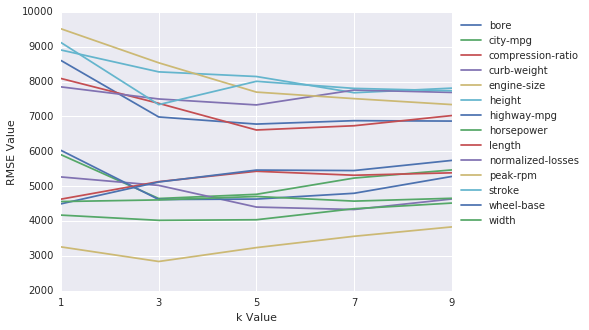

In [47]:
# Plotting the results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(7)
ax.plot(rmse_df)
ax.set_xlabel('k Value')
ax.set_ylabel('RMSE Value')
ax.set_xticks(k_values)
plt.legend(rmse_df, loc='best', bbox_to_anchor=(1.0, 1.0))
plt.show()

Now, we'll modify the function to work with multiple columns, aka **Multivariate Model**, but we're going to use the default k value.

In [77]:
# Multivariate, single k value
def knn_train_test(train_cols, target_col, df):
    # Shuffle rows
    np.random.seed(1)
    shuffled_indexes = np.random.permutation(df.index)
    work_df = df.reindex(shuffled_indexes)
    # Split rows
    split_number = len(work_df) // 2
    train_df = work_df.iloc[:split_number].copy()
    test_df = work_df.iloc[split_number:].copy()
    # Fit model using k nearest neighbors
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_cols], train_df[target_col])
    # Make predictions using model
    predictions = knn.predict(test_df[train_cols])
    # Calculate RMSE
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse ** (1/2)
    return rmse

Now, we're going to calculate the mean for each feature, and use the top features to work on our function.

In [82]:
rmse_df.describe().loc['mean'].sort_values()

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-ratio    7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
Name: mean, dtype: float64

In [73]:
top_features = list(rmse_df.describe().loc['mean'].sort_values().head().index)
print(top_features)

['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg']


Finally, we'll pass in the values and calculate the RMSE.

In [78]:
# Test using 2 features
rmse_2_features = knn_train_test(top_features[:2], 'price', normalized_cdf)

# Test using 3 features
rmse_3_features = knn_train_test(top_features[:3], 'price', normalized_cdf)

# Test using 4 features
rmse_4_features = knn_train_test(top_features[:4], 'price', normalized_cdf)

# Test using 5 features
rmse_5_features = knn_train_test(top_features[:5], 'price', normalized_cdf)

In [79]:
print('Using 2 Features:', str(rmse_2_features))
print('Using 3 Features:', str(rmse_3_features))
print('Using 4 Features:', str(rmse_4_features))
print('Using 5 Features:', str(rmse_5_features))

Using 2 Features: 2949.8817277180374
Using 3 Features: 3580.7376651928435
Using 4 Features: 3487.340917327035
Using 5 Features: 3410.2170133901805


From the above, using 2 features model, 5 features model, and 4 features model work the best respectively.

## Optimizing the Model
---

Here, we'll optimize the model that performed the best in the previous step. We'll take the top 3 models, and vary the hyperparameter from 1 to 25.

In [106]:
hyper_params = [x for x in range(1,26)]
two_features = top_features[:2]
five_features = top_features
four_features = top_features[:4]

two_mse_values = list()
five_mse_values = list()
four_mse_values = list()

two_hyp_mse = dict()
five_hyp_mse = dict()
four_hyp_mse = dict()

def knn_train_test(train_cols, target_col, df, append_list, dic):
    # Shuffle rows
    np.random.seed(1)
    shuffled_indexes = np.random.permutation(df.index)
    work_df = df.reindex(shuffled_indexes)
    # Split rows
    split_number = len(work_df) // 2
    train_df = work_df.iloc[:split_number].copy()
    test_df = work_df.iloc[split_number:].copy()
    for hp in hyper_params:
        # Fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors=hp)
        knn.fit(train_df[train_cols], train_df[target_col])
        # Make predictions using model
        predictions = knn.predict(test_df[train_cols])
        # Calculate RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse ** (1/2)
        append_list.append(rmse)
    min_val = min(append_list)
    for count, value in enumerate(append_list):
        if value == min_val:
            dic[count + 1] = value

In [107]:
knn_train_test(two_features, 'price', normalized_cdf, two_mse_values, two_hyp_mse)
knn_train_test(five_features, 'price', normalized_cdf, five_mse_values, five_hyp_mse)
knn_train_test(four_features, 'price', normalized_cdf, four_mse_values, four_hyp_mse)

In [115]:
print(two_hyp_mse)
print(five_hyp_mse)
print(four_hyp_mse)

{2: 2657.7963807419765}
{1: 2824.7061233282866}
{1: 2952.725686581471}


From the above:
1. The two features model has an optimal k value of 2.
2. The five features model has an optimal k value of 1.
3. The four features model has an optimal k value of 1.

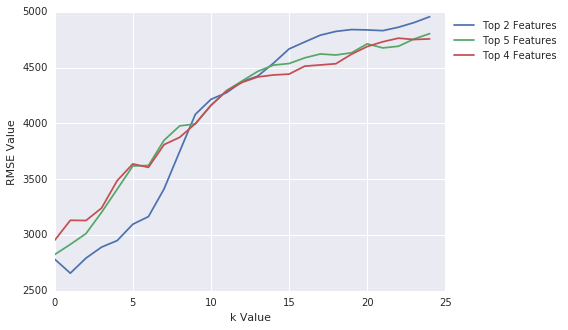

In [119]:
# Plotting the results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(7)
ax.plot(two_mse_values)
ax.plot(five_mse_values)
ax.plot(four_mse_values)
ax.set_xlabel('k Value')
ax.set_ylabel('RMSE Value')
plt.legend(['Top 2 Features','Top 5 Features','Top 4 Features'], loc='best', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [121]:
top_features[:2]

['engine-size', 'horsepower']

## Conclusion
---
The best model to choose here is a 2 features model (based on engine-size, and hoursepower) with a k value of 2.

# Thank you.
**Hashem Ahmed**
**https://hashem.io/**